In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import seed
from random import random

In [2]:
# dT/dt=-beta*T*V
# dE/dt=beta*T*V-k*E
# dI/dt=k*E-delta*I
# dV/dt=p*I-c*V-beta*T*V
# with parameters beta=3.2*10^(-6),k =4, delta=5.2, p=0.046, c=5.2

In [3]:
# Fix random seed for repeatability
np.random.seed(123)

# Set values for parameters
steps = 12000
cycles = 500  # Number of trajectories iterated over

beta=5*(10**(-7))
#beta=5*(10**(-5))
k=4
delta=2
p=12.6
c=5
beta_v=5*(10**(-7))

In [4]:
T = np.zeros((cycles,steps+1))
E = np.zeros((cycles,steps+1))
I = np.zeros((cycles,steps+1))
V = np.zeros((cycles,steps+1))
Time_mesh = np.zeros((cycles,steps+1))

In [5]:
# Set initial values
T[:,0]=8*(10**7)
#T[:,0]=1.33*(10**5)
E[:,0]=0
I[:,0]=0
V[:,0]=1

In [6]:
###### Main Code Loop ######
Step_end=np.zeros(cycles)
V_end=np.zeros(cycles)
for i in range(cycles):
    u = np.zeros(steps)
# generate random numbers between 0-1
    for j in range(steps):
	    u[j] = random()
        
    for kk in range(steps):
        q = [beta*T[i,kk]*V[i,kk], k*E[i,kk], delta*I[i,kk], p*I[i,kk], c*V[i,kk]]
        
        if (V[i,kk]>=50):
            Step_end[i]=kk
            V_end[i]=V[i,kk]
            break
            
        if (E[i,kk]+I[i,kk]+V[i,kk]==0):
            Step_end[i]=kk
            V_end[i]=V[i,kk]
            break
            
        qsum = np.cumsum(q/sum(q)) 
        Time_mesh[i,kk] = np.random.exponential(1/sum(q), 1)
            
        if u[kk]<=qsum[0]:
            T[i,kk+1]=T[i,kk]-1
            E[i,kk+1]=E[i,kk]+1
            I[i,kk+1]=I[i,kk]
            V[i,kk+1]=V[i,kk]-1
        elif u[kk]<=qsum[1]:
            T[i,kk+1]=T[i,kk]
            E[i,kk+1]=E[i,kk]-1
            I[i,kk+1]=I[i,kk]+1
            V[i,kk+1]=V[i,kk]
        elif u[kk]<=qsum[2]:
            T[i,kk+1]=T[i,kk]
            E[i,kk+1]=E[i,kk]
            I[i,kk+1]=I[i,kk]-1
            V[i,kk+1]=V[i,kk]
        elif u[kk]<=qsum[3]:
            T[i,kk+1]=T[i,kk]
            E[i,kk+1]=E[i,kk]
            I[i,kk+1]=I[i,kk]
            V[i,kk+1]=V[i,kk]+1
        elif u[kk]<=qsum[4]:
            T[i,kk+1]=T[i,kk]
            E[i,kk+1]=E[i,kk]
            I[i,kk+1]=I[i,kk]
            V[i,kk+1]=V[i,kk]-1
        else:
            T[i,kk+1]=T[i,kk]
            E[i,kk+1]=E[i,kk]
            I[i,kk+1]=I[i,kk]
            V[i,kk+1]=V[i,kk]


Time_mesh = np.cumsum(Time_mesh,axis=1)

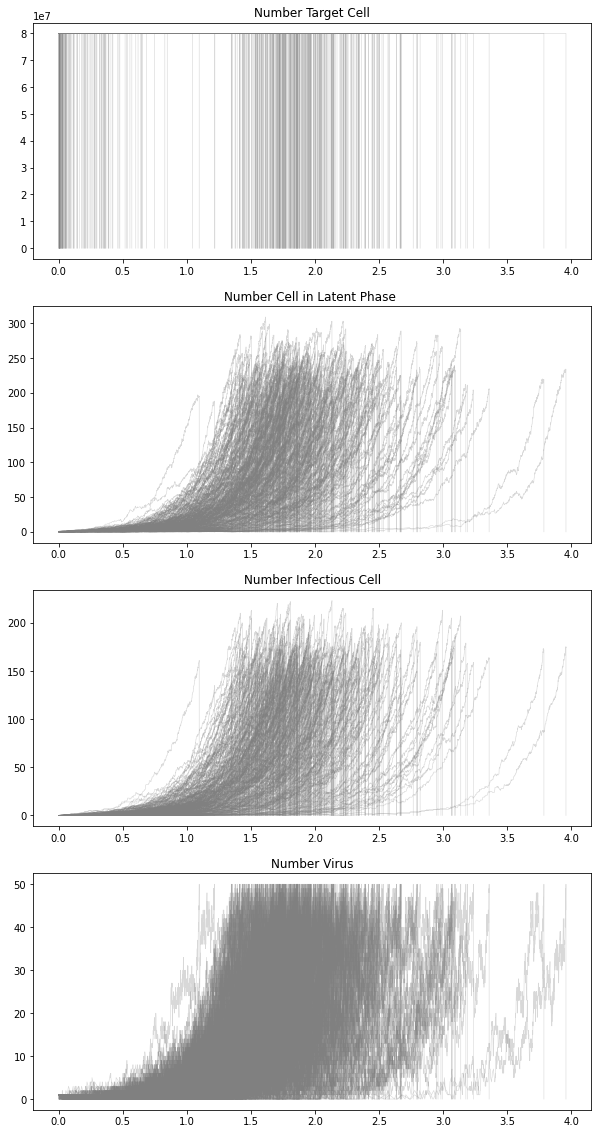

In [7]:
# Calculate average arrays
T_ave = T.mean(axis=0)
E_ave = E.mean(axis=0)
I_ave = I.mean(axis=0)
V_ave = V.mean(axis=0)

###### Plot Trajectories ######
fig, axs = plt.subplots(4, 1, figsize=(10,20))

# Plot average trajectories
#axs[0].plot(Time_mesh, T_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
#axs[0].set_title('Number Target Cell')
#axs[0].set_ylim((0,7*(10**7)))
#axs[0].set_xlim((0,2))
#axs[1].plot(Time_mesh, E_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
#axs[1].set_title('Number Cell in Latent Phase ')
#axs[1].set_ylim((0,7*(10**7)))
#axs[1].set_xlim((0,2))
#axs[2].plot(Time_mesh, I_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
#axs[2].set_title('Number Infectious Cell')
#axs[2].set_ylim((0,7*(10**7)))
#axs[2].set_xlim((0,2))
#axs[3].plot(Time_mesh, V_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
#axs[3].set_title('Number Virus')
#axs[3].set_xlabel("Time")
#axs[3].set_ylim((0,7*(10**7)))
#axs[3].set_xlim((0,2))

# Plot each simulated trajectory
for i in range(cycles):
    axs[0].plot(Time_mesh[i,:], T[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[1].plot(Time_mesh[i,:], E[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[2].plot(Time_mesh[i,:], I[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[3].plot(Time_mesh[i,:], V[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)

axs[0].set_title('Number Target Cell')
axs[1].set_title('Number Cell in Latent Phase ')
axs[2].set_title('Number Infectious Cell')
axs[3].set_title('Number Virus')

plt.show()



In [8]:
print(Step_end.size)
#print(Step_end[4])
#print(Step_end)

500


In [9]:
Time_mesh_end=np.zeros(cycles)
for j in range(cycles):
    st=int(Step_end[j])
    Time_mesh_end[j]=Time_mesh[j,st]
#print(Time_mesh_end)

In [10]:
Time_mesh_end_0=[]
Time_mesh_end_100=[]
for j in range(cycles):
    st=int(Step_end[j])
    Time_mesh_end[j]=Time_mesh[j,st]
    if (V_end[j]==0):
        Time_mesh_end_0.append(Time_mesh_end[j])
    if (V_end[j]==50):
        Time_mesh_end_100.append(Time_mesh_end[j])

In [11]:
print(np.count_nonzero(Time_mesh_end==0))

0


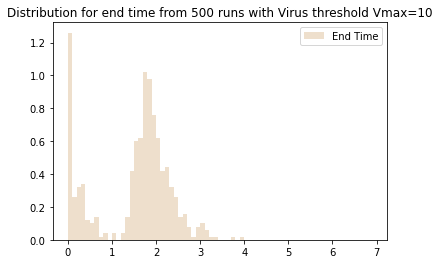

In [12]:
plt.hist(Time_mesh_end, density=True, bins=np.arange(0,7,0.1),label="End Time", color='#EEDFCC')
plt.title('Distribution for end time from 500 runs with Virus threshold Vmax=10')
plt.legend()
plt.show()

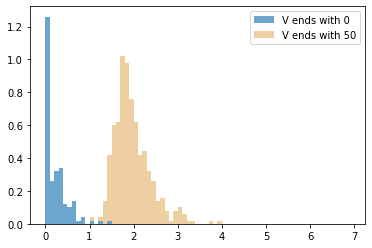

In [13]:
plt.figure()
plt.hist([Time_mesh_end_0,Time_mesh_end_100], bins=np.arange(0,7,0.1), stacked=True, density=True, label=('V ends with 0','V ends with 50'),color=('#6CA6CD','#EECFA1'))
plt.legend()
plt.show()

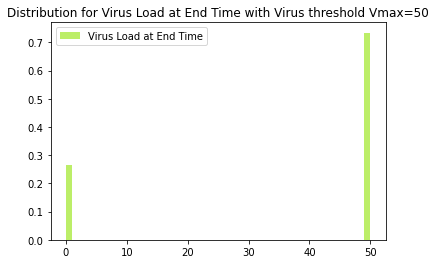

In [14]:
plt.hist(V_end, density=True, bins=np.arange(51),label="Virus Load at End Time", color='#BCEE68')
plt.title('Distribution for Virus Load at End Time with Virus threshold Vmax=50')
plt.legend()
plt.show()

In [18]:
print('Virus Extinction Probability is')
print(np.count_nonzero(V_end==0)/cycles)

Virus Extinction Probability is
0.266


In [16]:
print(np.count_nonzero(Step_end==0))

0
